In [77]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
# import k-means from clustering stage
from sklearn.cluster import KMeans

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Matplotlib and associated plotting modules
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [78]:
CLIENT_ID = 'H5R45YIJRSTVM522D1VYYZW4JCVEDKL5QI3V1JCCRA5W3YKX' # your Foursquare ID
CLIENT_SECRET = 'FI3JVQU42B54MVL5WO0AT5EPKFDKKOPWCB3ANFY5MVWANZ4I' # your Foursquare Secret
VERSION = '20181223'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H5R45YIJRSTVM522D1VYYZW4JCVEDKL5QI3V1JCCRA5W3YKX
CLIENT_SECRET:FI3JVQU42B54MVL5WO0AT5EPKFDKKOPWCB3ANFY5MVWANZ4I


# Looking for Starbucks shops in around center of Dayton at distance 100km 

In [79]:
address = '33 E 5th St, Dayton, OH' #Crown Plaza Dayton

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

C:\Users\ivanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


39.7569522826117 -84.1904495297411


In [80]:
search_query = 'starbucks'
radius = 100000
print(search_query + ' .... OK!')
LIMIT=30


starbucks .... OK!


In [81]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,  VERSION, search_query, radius, LIMIT)
url 

'https://api.foursquare.com/v2/venues/search?client_id=H5R45YIJRSTVM522D1VYYZW4JCVEDKL5QI3V1JCCRA5W3YKX&client_secret=FI3JVQU42B54MVL5WO0AT5EPKFDKKOPWCB3ANFY5MVWANZ4I&ll=39.7569522826117,-84.1904495297411&v=20181223&query=starbucks&radius=100000&limit=30'

In [82]:
rate=[7.8,5.9,7.7,8.5,8.2,8,7.4,8,8.4,8,8.1,8,7.4,7.8,7.3,7.6,7.7,7.7,7.2,7.3,7.9,7.6,8.1,8,7.2,7.3,7.1,6.7,7.5,7.2]
    

In [83]:
results = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
results

This venue has not been rated yet.


{'meta': {'code': 200, 'requestId': '5c327ddaf594df3ac19f42d6'},
 'response': {'venues': [{'id': '4b4e1e34f964a520d5e126e3',
    'name': 'Starbucks',
    'location': {'address': '1134 Brown Street',
     'lat': 39.7423325,
     'lng': -84.18219353,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.7423325,
       'lng': -84.18219353}],
     'distance': 1774,
     'postalCode': '45409',
     'cc': 'US',
     'city': 'Dayton',
     'state': 'OH',
     'country': 'United States',
     'formattedAddress': ['1134 Brown Street',
      'Dayton, OH 45409',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1546812890',
    'hasPerk': False},
   {'id': '4fc9457bd4f24895b4467787',
    'name': 'Starbucks',


In [84]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b4e1e34f964a520d5e126e3,1134 Brown Street,US,Dayton,United States,NaN,1774,"[1134 Brown Street, Dayton, OH 45409, United S...","[{'label': 'display', 'lat': 39.7423325, 'lng'...",39.742333,-84.182194,45409,OH,Starbucks,v-1546812890
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4fc9457bd4f24895b4467787,444 W 3rd St,US,Dayton,United States,NaN,836,"[444 W 3rd St, Dayton, OH 45402, United States]","[{'label': 'display', 'lat': 39.757082, 'lng':...",39.757082,-84.200228,45402,OH,Starbucks,v-1546812890
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c5aaa7dd3aee21e56276b55,2115 E Dorothy Ln,US,Kettering,United States,Inside Kroger,8132,"[2115 E Dorothy Ln (Inside Kroger), Kettering,...","[{'label': 'display', 'lat': 39.70437397056027...",39.704374,-84.124491,45420,OH,Starbucks,v-1546812890
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,52febba0498e043a121ac0fa,2735 N. Fairfield Rd,US,Beavercreek,United States,NaN,11808,"[2735 N. Fairfield Rd, Beavercreek, OH 45431, ...","[{'label': 'display', 'lat': 39.76805574761282...",39.768056,-84.053214,45431,OH,Starbucks,v-1546812890
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b4bd172f964a520b1a826e3,2424 Far Hills Avenue,US,Oakwood,United States,NaN,5613,"[2424 Far Hills Avenue, Oakwood, OH 45419, Uni...","[{'label': 'display', 'lat': 39.70887549, 'lng...",39.708875,-84.170678,45419,OH,Starbucks,v-1546812890


In [85]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]


In [86]:
df=dataframe_filtered
df


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Starbucks,Coffee Shop,1134 Brown Street,US,Dayton,United States,NaN,1774,"[1134 Brown Street, Dayton, OH 45409, United S...","[{'label': 'display', 'lat': 39.7423325, 'lng'...",39.742333,-84.182194,45409,OH,4b4e1e34f964a520d5e126e3
1,Starbucks,Coffee Shop,444 W 3rd St,US,Dayton,United States,NaN,836,"[444 W 3rd St, Dayton, OH 45402, United States]","[{'label': 'display', 'lat': 39.757082, 'lng':...",39.757082,-84.200228,45402,OH,4fc9457bd4f24895b4467787
2,Starbucks,Coffee Shop,2115 E Dorothy Ln,US,Kettering,United States,Inside Kroger,8132,"[2115 E Dorothy Ln (Inside Kroger), Kettering,...","[{'label': 'display', 'lat': 39.70437397056027...",39.704374,-84.124491,45420,OH,4c5aaa7dd3aee21e56276b55
3,Starbucks,Coffee Shop,2735 N. Fairfield Rd,US,Beavercreek,United States,NaN,11808,"[2735 N. Fairfield Rd, Beavercreek, OH 45431, ...","[{'label': 'display', 'lat': 39.76805574761282...",39.768056,-84.053214,45431,OH,52febba0498e043a121ac0fa
4,Starbucks,Coffee Shop,2424 Far Hills Avenue,US,Oakwood,United States,NaN,5613,"[2424 Far Hills Avenue, Oakwood, OH 45419, Uni...","[{'label': 'display', 'lat': 39.70887549, 'lng...",39.708875,-84.170678,45419,OH,4b4bd172f964a520b1a826e3
5,Starbucks,Coffee Shop,3800 Colonel Glenn Highway,US,Fairborn,United States,NaN,10513,"[3800 Colonel Glenn Highway, Fairborn, OH 4532...","[{'label': 'display', 'lat': 39.77688702, 'lng...",39.776887,-84.070344,45324,OH,4b8dd66ff964a520111033e3
6,Starbucks,Coffee Shop,4341 Feedwire Rd,US,Dayton,United States,NaN,13182,"[4341 Feedwire Rd, Dayton, OH 45440, United St...","[{'label': 'display', 'lat': 39.65878052672900...",39.658781,-84.104364,45440,OH,4c23cda1c11dc9b62f6f2424
7,Starbucks,Coffee Shop,2727 Fairfield Commons,US,Beavercreek,United States,NaN,11525,"[2727 Fairfield Commons, Beavercreek, OH 45431...","[{'label': 'display', 'lat': 39.76727243, 'lng...",39.767272,-84.056432,45431,OH,4bc9f99a511f95210eadaec7
8,Starbucks,Coffee Shop,2765 Miamisburg-Centerville Rd,US,Dayton,United States,NaN,13554,"[2765 Miamisburg-Centerville Rd, Dayton, OH 45...","[{'label': 'display', 'lat': 39.637171, 'lng':...",39.637171,-84.218905,45459,OH,4b9aaebdf964a5208ecc35e3
9,Starbucks,Coffee Shop,9500 Springboro Pike,US,Miamisburg,United States,NaN,16373,"[9500 Springboro Pike, Miamisburg, OH 45342, U...","[{'label': 'display', 'lat': 39.61257719, 'lng...",39.612577,-84.226963,45342,OH,4b55bd8af964a520e2ed27e3


In [87]:
df['rating']=rate

In [88]:
cost_of_living=[83,83,91,100,110,90,83,100,83,92,83,98,100,84,89,105,86,85,88,84,84,89,92,87,89,89,89,106,
                             105,89]

In [89]:
livability=[60,60,86,81,100,75,60,81,60,84,60,83,81,90,68,89,65,64,72,90,90,68,78,72,68,66,68,86,89,68]

In [90]:
df['cost_of_living']=cost_of_living
df['livability']=livability
dff=df.drop(['formattedAddress','crossStreet','country','cc','id','labeledLatLngs','postalCode'],axis=1)
dff

,name,categories,address,city,distance,lat,lng,state,rating,cost_of_living,livability
0,Starbucks,Coffee Shop,1134 Brown Street,Dayton,1774,39.742333,-84.182194,OH,7.8,83,60
1,Starbucks,Coffee Shop,444 W 3rd St,Dayton,836,39.757082,-84.200228,OH,5.9,83,60
2,Starbucks,Coffee Shop,2115 E Dorothy Ln,Kettering,8132,39.704374,-84.124491,OH,7.7,91,86
3,Starbucks,Coffee Shop,2735 N. Fairfield Rd,Beavercreek,11808,39.768056,-84.053214,OH,8.5,100,81
4,Starbucks,Coffee Shop,2424 Far Hills Avenue,Oakwood,5613,39.708875,-84.170678,OH,8.2,110,100
5,Starbucks,Coffee Shop,3800 Colonel Glenn Highway,Fairborn,10513,39.776887,-84.070344,OH,8.0,90,75
6,Starbucks,Coffee Shop,4341 Feedwire Rd,Dayton,13182,39.658781,-84.104364,OH,7.4,83,60
7,Starbucks,Coffee Shop,2727 Fairfield Commons,Beavercreek,11525,39.767272,-84.056432,OH,8.0,100,81
8,Starbucks,Coffee Shop,2765 Miamisburg-Centerville Rd,Dayton,13554,39.637171,-84.218905,OH,8.4,83,60
9,Starbucks,Coffee Shop,9500 Springboro Pike,Miamisburg,16373,39.612577,-84.226963,OH,8.0,92,84


In [91]:
df_grouped = dff.groupby('rating').mean().reset_index()
df_grouped

,rating,distance,lat,lng,cost_of_living,livability
0,5.9,836.000000,39.757082,-84.200228,83.000000,60.000000
1,6.7,78241.000000,39.090134,-84.478081,106.000000,86.000000
2,7.1,64066.000000,39.199701,-84.376842,89.000000,68.000000
3,7.2,60380.666667,39.239333,-84.388321,88.666667,69.333333
4,7.3,51754.000000,39.308558,-84.341198,87.333333,74.666667
5,7.4,12690.000000,39.692136,-84.079150,91.500000,70.500000
6,7.5,66210.000000,39.252561,-84.598978,105.000000,89.000000
7,7.6,53613.500000,39.573209,-84.581466,97.000000,78.500000
8,7.7,31420.000000,39.678077,-84.153448,87.333333,71.666667
9,7.8,24536.000000,39.549640,-84.279247,83.500000,75.000000


In [92]:
# set number of clusters
kclusters = 2

df_grouped_clustering = df_grouped.drop('distance', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [93]:
# add clustering labels
df_grouped['Cluster Labels'] = kmeans.labels_

In [94]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_grouped['lat'], df_grouped['lng'], df_grouped['rating'], df_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [95]:
#df_grouped.to_csv('out.csv')

In [96]:
print(df_grouped.describe())

          rating      distance        lat        lng  cost_of_living  \
count  16.000000     16.000000  16.000000  16.000000       16.000000   
mean    7.581250  36933.310417  39.488815 -84.307587       92.264583   
std     0.663545  24566.598618   0.222774   0.168800        8.798699   
min     5.900000    836.000000  39.090134 -84.598978       83.000000   
25%     7.275000  13338.000000  39.294559 -84.414528       86.500000   
50%     7.650000  36386.000000  39.561425 -84.310223       88.833333   
75%     8.025000  55305.291667  39.681591 -84.168610       97.750000   
max     8.500000  78241.000000  39.768056 -84.053214      110.000000   

       livability  Cluster Labels  
count   16.000000       16.000000  
mean    76.354167        0.437500  
std     10.955951        0.512348  
min     60.000000        0.000000  
25%     69.250000        0.000000  
50%     74.833333        0.000000  
75%     82.250000        1.000000  
max    100.000000        1.000000  


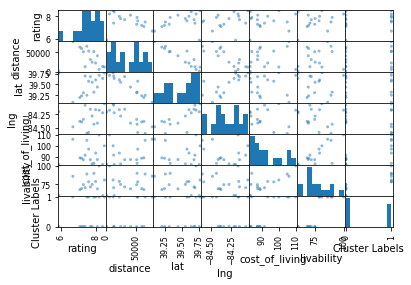

In [97]:
scatter_matrix(df_grouped)
plt.show()

In [152]:
array = df_grouped.values
features = array[:,0:6]
target = array[:,6]
features= preprocessing.StandardScaler().fit(features).transform(features)
validation_size = 0.20
seed = 7
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size=validation_size, random_state=seed)

In [153]:
seed = 7
scoring = 'accuracy'

In [154]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, features_train, target_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.750000 (0.403113)
LDA: 0.800000 (0.400000)
KNN: 0.550000 (0.471699)
CART: 1.000000 (0.000000)
NB: 0.750000 (0.403113)
SVM: 0.800000 (0.400000)


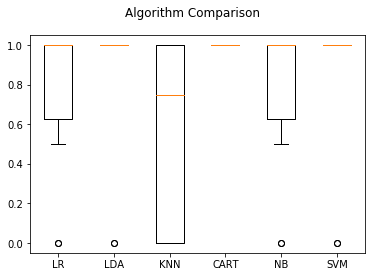

In [155]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Decision Tree

In [166]:
features= preprocessing.StandardScaler().fit(features).transform(features)
from sklearn.model_selection import train_test_split
features_train,  features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=3)


In [167]:
cls = DecisionTreeClassifier(criterion = "entropy")
cls # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [168]:
cls.fit(features_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [169]:
target_tree = cls.predict(features_test)
print (target_train [0:6])
print (target_test [0:6])

[1. 1. 1. 1. 0. 0.]
[0. 1. 1. 1. 1.]


In [170]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(target_test, target_tree))

DecisionTrees's Accuracy:  1.0


In [171]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(target_test, target_tree)

1.0

# Gaussian NB

In [162]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [172]:
features= preprocessing.StandardScaler().fit(features).transform(features)
from sklearn.model_selection import train_test_split
features_train,  features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=3)

In [201]:
clf = GaussianNB()
clf.fit(features_train,target_train)
target_pred = clf.predict(features_test)
target_pred

array([0., 1., 1., 1., 1.])

In [174]:
accuracy_score(target_test, target_pred, normalize = True)

1.0

# Model Evaluation using Test set

In [175]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Looking for Starbucks shops in around center of Columbus at distance 100km 

In [176]:
address = '350 N High St, Columbus, OH' #Hyatt Regency Columbus

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

C:\Users\ivanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


39.9701254 -83.0006350626856


In [177]:
search_query = 'starbucks'
radius = 100000
print(search_query + ' .... OK!')
LIMIT=30


starbucks .... OK!


In [178]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,  VERSION, search_query, radius, LIMIT)
url 

'https://api.foursquare.com/v2/venues/search?client_id=H5R45YIJRSTVM522D1VYYZW4JCVEDKL5QI3V1JCCRA5W3YKX&client_secret=FI3JVQU42B54MVL5WO0AT5EPKFDKKOPWCB3ANFY5MVWANZ4I&ll=39.9701254,-83.0006350626856&v=20181223&query=starbucks&radius=100000&limit=30'

In [179]:
results = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
results

This venue has not been rated yet.


{'meta': {'code': 200, 'requestId': '5c328063dd57970a2edca80a'},
 'response': {'venues': [{'id': '4b0ac623f964a5209e2723e3',
    'name': 'Starbucks',
    'location': {'address': '339 N Front St',
     'lat': 39.970058,
     'lng': -83.000623,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.970058,
       'lng': -83.000623}],
     'distance': 7,
     'postalCode': '43215',
     'cc': 'US',
     'city': 'Columbus',
     'state': 'OH',
     'country': 'United States',
     'formattedAddress': ['339 N Front St',
      'Columbus, OH 43215',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1546813539',
    'hasPerk': False},
   {'id': '4b0d3a58f964a520d64423e3',
    'name': 'Starbucks',
    'locati

In [180]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b0ac623f964a5209e2723e3,339 N Front St,US,Columbus,United States,NaN,7,"[339 N Front St, Columbus, OH 43215, United St...","[{'label': 'display', 'lat': 39.970058, 'lng':...",39.970058,-83.000623,NaN,43215,OH,Starbucks,v-1546813539
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b0d3a58f964a520d64423e3,88 East Broad Street,US,Columbus,United States,NaN,843,"[88 East Broad Street, Columbus, OH 43215, Uni...","[{'label': 'display', 'lat': 39.96278391, 'lng...",39.962784,-82.998190,NaN,43215,OH,Starbucks,v-1546813539
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b064701f964a52045ea22e3,650 South 3rd Street,US,Columbus,United States,E Sycamore St,2385,"[650 South 3rd Street (E Sycamore St), Columbu...","[{'label': 'display', 'lat': 39.9491, 'lng': -...",39.949100,-82.995224,NaN,43206,OH,Starbucks,v-1546813539
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b2598c6f964a520547424e3,1570 Olentangy River Road,US,Columbus,United States,NaN,3272,"[1570 Olentangy River Road, Columbus, OH 43212...","[{'label': 'display', 'lat': 39.99255579081834...",39.992556,-83.025442,NaN,43212,OH,Starbucks,v-1546813539
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b17aacff964a520f1c623e3,1085 W 5th Ave,US,Columbus,United States,Eastview Ave,3565,"[1085 W 5th Ave (Eastview Ave), Columbus, OH 4...","[{'label': 'display', 'lat': 39.988086, 'lng':...",39.988086,-83.035245,NaN,43212,OH,Starbucks,v-1546813539


In [181]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]


In [182]:
df=dataframe_filtered
df

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Starbucks,Coffee Shop,339 N Front St,US,Columbus,United States,NaN,7,"[339 N Front St, Columbus, OH 43215, United St...","[{'label': 'display', 'lat': 39.970058, 'lng':...",39.970058,-83.000623,NaN,43215,OH,4b0ac623f964a5209e2723e3
1,Starbucks,Coffee Shop,88 East Broad Street,US,Columbus,United States,NaN,843,"[88 East Broad Street, Columbus, OH 43215, Uni...","[{'label': 'display', 'lat': 39.96278391, 'lng...",39.962784,-82.998190,NaN,43215,OH,4b0d3a58f964a520d64423e3
2,Starbucks,Coffee Shop,650 South 3rd Street,US,Columbus,United States,E Sycamore St,2385,"[650 South 3rd Street (E Sycamore St), Columbu...","[{'label': 'display', 'lat': 39.9491, 'lng': -...",39.949100,-82.995224,NaN,43206,OH,4b064701f964a52045ea22e3
3,Starbucks,Coffee Shop,1570 Olentangy River Road,US,Columbus,United States,NaN,3272,"[1570 Olentangy River Road, Columbus, OH 43212...","[{'label': 'display', 'lat': 39.99255579081834...",39.992556,-83.025442,NaN,43212,OH,4b2598c6f964a520547424e3
4,Starbucks,Coffee Shop,1085 W 5th Ave,US,Columbus,United States,Eastview Ave,3565,"[1085 W 5th Ave (Eastview Ave), Columbus, OH 4...","[{'label': 'display', 'lat': 39.988086, 'lng':...",39.988086,-83.035245,NaN,43212,OH,4b17aacff964a520f1c623e3
5,Starbucks,Coffee Shop,1782 North High Street,US,Columbus,United States,NaN,3244,"[1782 North High Street, Columbus, OH 43201, U...","[{'label': 'display', 'lat': 39.99879, 'lng': ...",39.998790,-83.007500,NaN,43201,OH,4b06464cf964a5203fea22e3
6,Starbucks,Coffee Shop,Concourse B,US,Columbus,United States,CMH Airport,10581,"[Concourse B (CMH Airport), Columbus, OH 43219...","[{'label': 'display', 'lat': 39.99782080104830...",39.997821,-82.881962,NaN,43219,OH,4c1a1d44834e2d7f6c572b80
7,Starbucks,Coffee Shop,4141 Easton Loop E,US,Columbus,United States,NaN,11515,"[4141 Easton Loop E, Columbus, OH 43219, Unite...","[{'label': 'display', 'lat': 40.04971, 'lng': ...",40.049710,-82.914350,NaN,43219,OH,4b4a6abdf964a520ef8626e3
8,Starbucks,Coffee Shop,2450 East Main Street,US,Bexley,United States,NaN,5917,"[2450 East Main Street, Bexley, OH 43209, Unit...","[{'label': 'display', 'lat': 39.9572331746534,...",39.957233,-82.933345,NaN,43209,OH,4b0be8d7f964a520a83423e3
9,Starbucks,Coffee Shop,1315 W Lane Ave,US,Upper Arlington,United States,NaN,5581,"[1315 W Lane Ave, Upper Arlington, OH 43221, U...","[{'label': 'display', 'lat': 40.00638118064489...",40.006381,-83.045836,NaN,43221,OH,4b0c406df964a520ca3923e3


In [183]:
dff=df.drop(['formattedAddress','categories','crossStreet','country','cc','id','labeledLatLngs','postalCode','neighborhood'],axis=1)


In [184]:
cost_of_living=[89,89,89,89,89,89,89,108,89,89,115,118,89,89,98,89,89,86,89,89,93,93,89,91,100,89,115,89,115,89]

In [185]:
livability=[76,76,76,76,76,76,76,88,76,76,87,87,76,76,89,76,76,76,73,76,76,86,85,76,76,91,76,86,76,87]

In [186]:
rate=[8.1,8,7.7,7,7.8,8.1,7.7,7.9,8.1,6.8,8,7.2,7,7.2,6.6,8.2,7.8,7.4,7.8,6.6,8.2,8.3,8.7,8.1,8.6,8.1,8.2,8.3,7.9,8.1]

In [187]:
dff['cost_of_living']=cost_of_living
dff['livability']=livability
dff['rating']=rate
dff

,name,address,city,distance,lat,lng,state,cost_of_living,livability,rating
0,Starbucks,339 N Front St,Columbus,7,39.970058,-83.000623,OH,89,76,8.1
1,Starbucks,88 East Broad Street,Columbus,843,39.962784,-82.998190,OH,89,76,8.0
2,Starbucks,650 South 3rd Street,Columbus,2385,39.949100,-82.995224,OH,89,76,7.7
3,Starbucks,1570 Olentangy River Road,Columbus,3272,39.992556,-83.025442,OH,89,76,7.0
4,Starbucks,1085 W 5th Ave,Columbus,3565,39.988086,-83.035245,OH,89,76,7.8
5,Starbucks,1782 North High Street,Columbus,3244,39.998790,-83.007500,OH,89,76,8.1
6,Starbucks,Concourse B,Columbus,10581,39.997821,-82.881962,OH,89,76,7.7
7,Starbucks,4141 Easton Loop E,Columbus,11515,40.049710,-82.914350,OH,108,88,7.9
8,Starbucks,2450 East Main Street,Bexley,5917,39.957233,-82.933345,OH,89,76,8.1
9,Starbucks,1315 W Lane Ave,Upper Arlington,5581,40.006381,-83.045836,OH,89,76,6.8


In [188]:
df_grouped = dff.groupby('rating').mean().reset_index()
df_grouped

,rating,distance,lat,lng,cost_of_living,livability
0,6.6,12733.500000,40.026682,-82.873507,93.500000,82.500000
1,6.8,5581.000000,40.006381,-83.045836,89.000000,76.000000
2,7.0,2205.000000,39.976361,-83.011530,89.000000,76.000000
3,7.2,5604.500000,39.979461,-82.943628,103.500000,81.500000
4,7.4,13409.000000,39.951783,-83.155966,86.000000,76.000000
5,7.7,6483.000000,39.973460,-82.938593,89.000000,76.000000
6,7.8,6103.333333,40.010685,-82.993907,89.000000,75.000000
7,7.9,11273.000000,40.052029,-82.991582,111.500000,82.000000
8,8.0,8405.000000,40.017954,-83.064589,102.000000,81.500000
9,8.1,9520.833333,39.970560,-82.898543,89.333333,80.333333


In [189]:
# set number of clusters
kclusters = 2

df_grouped_clustering = df_grouped.drop('distance', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
# add clustering labels
df_grouped['Cluster Labels'] = kmeans.labels_

In [190]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_grouped['lat'], df_grouped['lng'], df_grouped['rating'], df_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [191]:
array = df_grouped.values
features = array[:,0:6]
target = array[:,6]

In [192]:
features= preprocessing.StandardScaler().fit(features).transform(features)

In [199]:
target_tree2 = cls.predict(features)
target_pred2 = clf.predict(features)
target_pred2


array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.])

In [202]:
dict = {'Algorithm': ['Decision Tree','Gaussian NB'],
       'Jaccard': [jaccard_similarity_score(target_tree2,target),
                   jaccard_similarity_score(target_pred2,target)]}
pd.DataFrame(dict)     

,Algorithm,Jaccard
0,Decision Tree,1.0
1,Gaussian NB,1.0
